In [11]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time

from IPython.display import clear_output
import plotly.express as px

In [12]:
output_file = "test.csv"
history_file = "history.csv"

speedtest_name = "speedtest"  # .exe"
options = f"--output-header -f csv > {output_file}"


In [13]:

def run_speedtest(speedtest_name: str, options: str) -> pd.DataFrame:
    print("Testing")

    # kickoff the CLI speedtest
    try:
        os.system(f"{speedtest_name} {options}")
    except Exception as e:
        print(str(e))
        return None

    # loadup the results from speedtest and add the current date-time
    try:
        data_df = pd.read_csv(output_file)
        data_df['date'] = [dt.datetime.now()]
        return data_df
    except Exception as e:
        # no results in output file from Speedtest.  Happens occasionally
        print(str(e))
        return None


def update_history_df(data_df: pd.DataFrame, history_file: str) -> pd.DataFrame:
    try:
        history_df = pd.read_csv(history_file)
        history_df = pd.concat([history_df, data_df], axis=0)
    except:
        if data_df is None:
            print("No results returned")
            history_df = data_df

    if history_df is not None:
        history_df.to_csv(history_file, index=False)
    
    return history_df


def show_updated_speed(history_df: pd.DataFrame) -> None:
    plot_df = history_df[['date', 'download']].rename({'download': 'mbps'}, axis=1)
    plot_df["type"] = "down"
    
    upload_df = history_df[['date', 'upload']].rename({'upload': 'mbps'}, axis=1)
    upload_df["type"] = "up"
    
    plot_df = pd.concat([plot_df, upload_df], axis=0)
    
    # convert from MBps to Mbps (2nd one is what everyone tells you you're getting)
    plot_df.loc[:, 'mbps'] *= 8 / 1e6
    
    fig = px.line(plot_df, x='date', y='mbps', color='type')
    fig.show()
    
    print(history_df[['download', 'upload']].describe())

    return None

                    server name  server id  idle latency  idle jitter  \
0  FORETHOUGHT.net - Denver, CO       3964        23.301      6.90225   

   packet loss  download   upload  download bytes  upload bytes  \
0            0  17289214  4509785       167600832      54314572   

                                           share url  ...  \
0  https://www.speedtest.net/result/c/d45b22c7-da...  ...   

   download latency jitter  download latency low  download latency high  \
0                  31.0641                21.957                566.285   

   upload latency  upload latency jitter  upload latency low  \
0         82.1846                26.7869              16.579   

   upload latency high  idle latency low  idle latency high  \
0              802.618            14.616             28.625   

                        date  
0 2022-12-19 16:04:59.403280  

[1 rows x 22 columns]
20/20 -- Waiting for 0.0 seconds


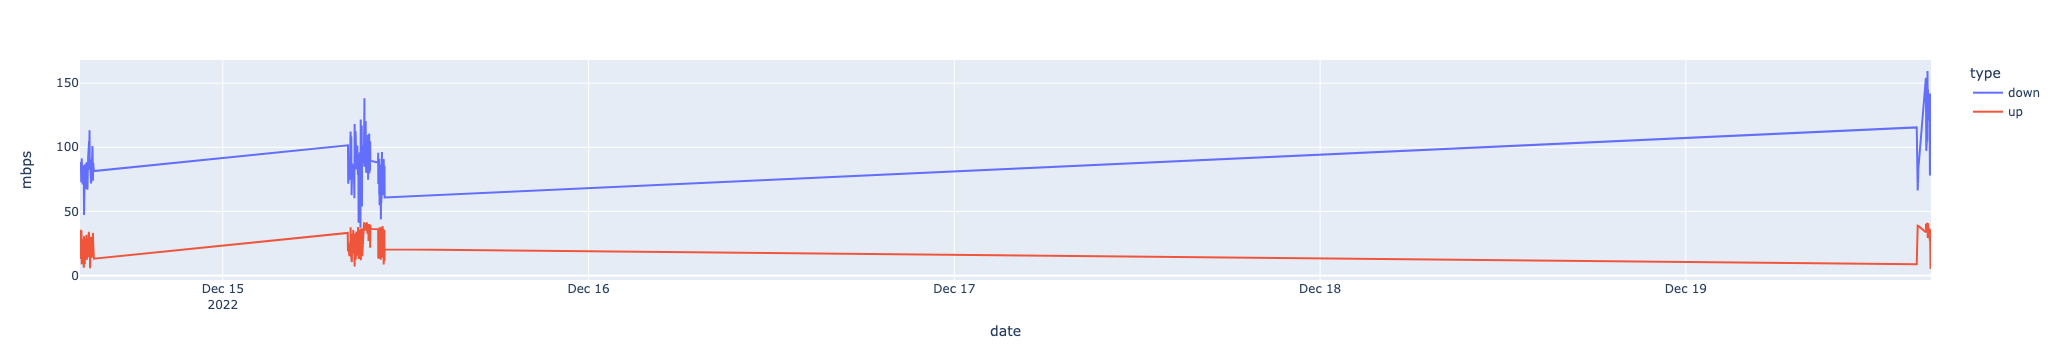

           download        upload
count  2.420000e+02  2.420000e+02
mean   1.145387e+07  3.653501e+06
std    2.771364e+06  1.286111e+06
min    4.670925e+06  6.392900e+05
25%    9.921139e+06  2.484574e+06
50%    1.105628e+07  4.126994e+06
75%    1.264992e+07  4.746296e+06
max    1.993401e+07  5.184646e+06
Done


In [17]:
# takes about 30 sec to run, so 30 seconds here = sampling once / minute
wait = 0.0  # min
loops = 20

for i in range(loops):
    print(i+1, ")", dt.datetime.now())

    data_df = run_speedtest(speedtest_name, options)
    history_df = update_history_df(data_df, history_file)
    
    if i < loops:
        clear_output(wait=False)
        print(data_df if data_df is not None else "")
        print(f"{i+1}/{loops} -- Waiting for {wait*60} seconds")
        time.sleep(wait * 60)

    show_updated_speed(history_df)

print("Done")

### Rechart

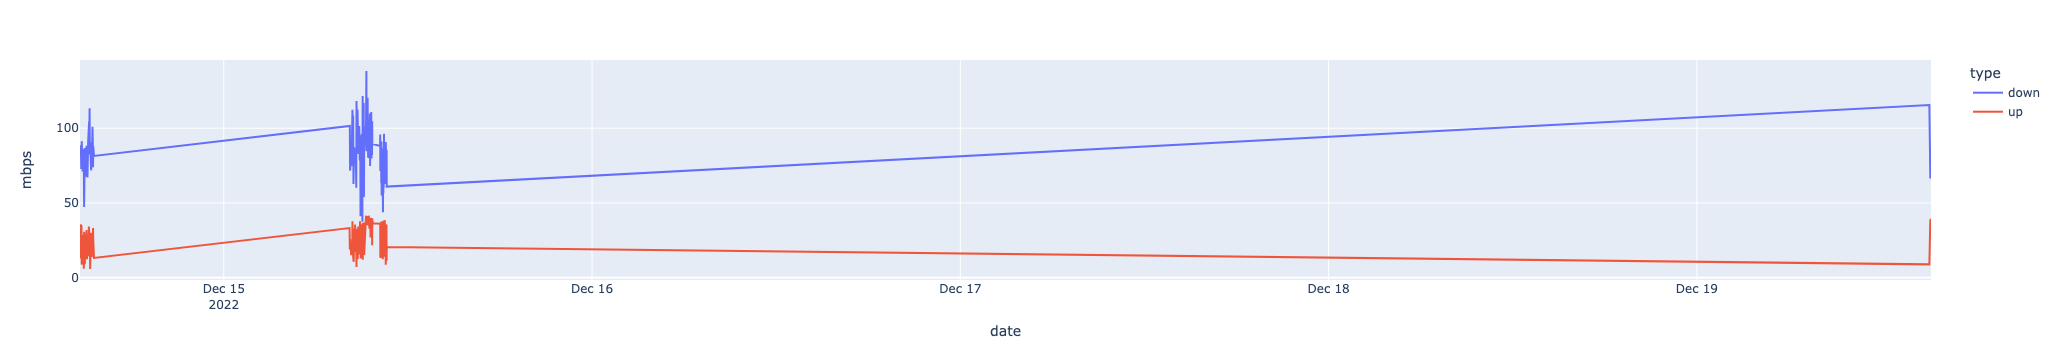

           download        upload
count  2.100000e+02  2.100000e+02
mean   1.077825e+07  3.561916e+06
std    2.005499e+06  1.270692e+06
min    4.670925e+06  7.211940e+05
25%    9.591185e+06  2.366972e+06
50%    1.081539e+07  3.984243e+06
75%    1.201687e+07  4.685279e+06
max    1.728547e+07  5.184646e+06


In [15]:
show_updated_speed(history_df)